In [3]:
import numpy as np
import pandas as pd
import glob
import os
import librosa

In [4]:
INPUT_DIR="C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle"
SAMPLE_RATE = 16000
MAX_SOUND_CLIP_DURATION=12 #sec  

In [5]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
#set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
frames = [set_a, set_b]
data_ab=pd.concat(frames)

In [6]:
print("Number of training examples=", data_ab.shape[0], "  Number of classes=", len(data_ab.label.unique()))

Number of training examples= 832   Number of classes= 6


In [7]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file = folder + file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [8]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [9]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190

fixing audio lenght : normal__201105011626.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201105021654.wav
fixing audio lenght : normal__201105021654.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201105021804.wav
fixing audio lenght : normal__201105021804.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201105151450.wav
fixing audio lenght : normal__201105151450.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201106111136.wav
fixing audio lenght : normal__201106111136.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201106141148.wav
fixing audio lenght : normal__201106141148.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201106151236.wav
fixing audio lenght : normal__201106151236.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/normal__201106210943.wav
fixing audio lenght 

fixing audio lenght : murmur__201108222245.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222246.wav
fixing audio lenght : murmur__201108222246.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222248.wav
fixing audio lenght : murmur__201108222248.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222251.wav
fixing audio lenght : murmur__201108222251.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222252.wav
fixing audio lenght : murmur__201108222252.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222253.wav
fixing audio lenght : murmur__201108222253.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222255.wav
fixing audio lenght : murmur__201108222255.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/murmur__201108222256.wav
fixing audio lenght 

fixing audio lenght : Aunlabelledtest__201108222225.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222228.wav
fixing audio lenght : Aunlabelledtest__201108222228.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222234.wav
fixing audio lenght : Aunlabelledtest__201108222234.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222241.wav
fixing audio lenght : Aunlabelledtest__201108222241.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222244.wav
fixing audio lenght : Aunlabelledtest__201108222244.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222247.wav
fixing audio lenght : Aunlabelledtest__201108222247.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_a/Aunlabelledtest__201108222254.wav
fixing audio lenght : Aunlabelledtest__201108222254.

In [10]:
%%time
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_106_1306776721273_A.wav
fixing au

load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_136_1306429977501_D1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_137_1306764999211_A1.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_A1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_137_1306764999211_A2.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_A2.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_137_1306764999211_B.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_137_1306764999211_C1.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_C1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_137_1306764999211_D1.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_D1.wav


load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_258_1309352253234_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_264_1309356143724_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_264_1309356143724_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_264_1309356143724_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_270_1309369533040_A.wav
fixing audio lenght : normal_noisynormal_270_1309369533040_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_270_1309369533040_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_271_1309369876160_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal_noisynormal_271_1309369876160_C.wav
fixing audio lenght : normal_noisynormal_271_13

fixing audio lenght : normal__143_1306763822290_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__143_1306763822290_C.wav
fixing audio lenght : normal__143_1306763822290_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__145_1307987561278_B.wav
fixing audio lenght : normal__145_1307987561278_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__145_1307987561278_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__146_1306778707532_A.wav
fixing audio lenght : normal__146_1306778707532_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__146_1306778707532_B.wav
fixing audio lenght : normal__146_1306778707532_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__146_1306778707532_D1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__146_1306778707532_D2.wav
fixing audio lenght : normal

fixing audio lenght : normal__176_1307988171173_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__176_1307988171173_B.wav
fixing audio lenght : normal__176_1307988171173_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__176_1307988171173_B1.wav
fixing audio lenght : normal__176_1307988171173_B1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__177_1307989650056_A1.wav
fixing audio lenght : normal__177_1307989650056_A1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__177_1307989650056_B.wav
fixing audio lenght : normal__177_1307989650056_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__177_1307989650056_D.wav
fixing audio lenght : normal__177_1307989650056_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__177_1307989650056_D1.wav
fixing audio lenght : normal__177_1307989650056_D1.wav
load file  C:/Us

fixing audio lenght : normal__224_1308337157445_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__227_1308594233667_B.wav
fixing audio lenght : normal__227_1308594233667_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__227_1308594233667_C.wav
fixing audio lenght : normal__227_1308594233667_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__230_1308595300880_B.wav
fixing audio lenght : normal__230_1308595300880_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__230_1308595300880_C.wav
fixing audio lenght : normal__230_1308595300880_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__232_1308748524018_A.wav
fixing audio lenght : normal__232_1308748524018_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/normal__232_1308748524018_B.wav
fixing audio lenght : normal__232_1308748524018_B.wav
load file  C:/Users/Ma

fixing audio lenght : murmur_noisymurmur_156_1306936373241_B1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_160_1307100683334_D.wav
fixing audio lenght : murmur_noisymurmur_160_1307100683334_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_161_1307101199321_B.wav
fixing audio lenght : murmur_noisymurmur_161_1307101199321_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_161_1307101199321_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_162_1307101835989_B_1.wav
fixing audio lenght : murmur_noisymurmur_162_1307101835989_B_1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_162_1307101835989_D.wav
fixing audio lenght : murmur_noisymurmur_162_1307101835989_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur_noisymurmur_164_1307106095995_C1.wav
fix

fixing audio lenght : murmur__197_1308141235553_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__197_1308141235553_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__200_1308144251434_C.wav
fixing audio lenght : murmur__200_1308144251434_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__200_1308144251434_D.wav
fixing audio lenght : murmur__200_1308144251434_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__203_1308162026258_B.wav
fixing audio lenght : murmur__203_1308162026258_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__203_1308162026258_C1.wav
fixing audio lenght : murmur__203_1308162026258_C1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur__203_1308162026258_D.wav
fixing audio lenght : murmur__203_1308162026258_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/murmur

fixing audio lenght : extrastole__202_1308145175747_C1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__202_1308145175747_C2.wav
fixing audio lenght : extrastole__202_1308145175747_C2.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__207_1308159792607_B.wav
fixing audio lenght : extrastole__207_1308159792607_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__207_1308159792607_B1.wav
fixing audio lenght : extrastole__207_1308159792607_B1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__209_1308162216750_D.wav
fixing audio lenght : extrastole__209_1308162216750_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__210_1308162935880_C.wav
fixing audio lenght : extrastole__210_1308162935880_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/extrastole__213_1308245263936_D.wav
fixing audio lenght : e

load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__123_1306331925797_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__125_1306332456645_B2.wav
fixing audio lenght : Bunlabelledtest__125_1306332456645_B2.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__126_1306777102824_C1.wav
fixing audio lenght : Bunlabelledtest__126_1306777102824_C1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__126_1306777102824_D1.wav
fixing audio lenght : Bunlabelledtest__126_1306777102824_D1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__127_1306764300147_D.wav
fixing audio lenght : Bunlabelledtest__127_1306764300147_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__128_1306344005749_C.wav
fixing audio lenght : Bunlabelledtest__128_1306344005749_C.wav
load file  C:/Users/Manis

fixing audio lenght : Bunlabelledtest__157_1306937583792_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__159_1307018640315_A.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_A.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__159_1307018640315_B.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__159_1307018640315_C.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__160_1307100683334_C.wav
fixing audio lenght : Bunlabelledtest__160_1307100683334_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__161_1307101199321_D.wav
fixing audio lenght : Bunlabelledtest__161_1307101199321_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabell

fixing audio lenght : Bunlabelledtest__206_1308159601959_C1.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__207_1308159792607_B3.wav
fixing audio lenght : Bunlabelledtest__207_1308159792607_B3.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__209_1308162216750_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__209_1308162216750_C.wav
fixing audio lenght : Bunlabelledtest__209_1308162216750_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__210_1308162935880_D.wav
fixing audio lenght : Bunlabelledtest__210_1308162935880_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__212_1308245076477_C.wav
fixing audio lenght : Bunlabelledtest__212_1308245076477_C.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__213_1308245263936_B.wav
fixing audio lenght : Bunlab

fixing audio lenght : Bunlabelledtest__287_1311170903290_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__288_1311164615284_B.wav
fixing audio lenght : Bunlabelledtest__288_1311164615284_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__290_1311182875320_B.wav
fixing audio lenght : Bunlabelledtest__290_1311182875320_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__293_1311680805936_B.wav
fixing audio lenght : Bunlabelledtest__293_1311680805936_B.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__293_1311680805936_B2.wav
fixing audio lenght : Bunlabelledtest__293_1311680805936_B2.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabelledtest__294_1311681084248_D.wav
fixing audio lenght : Bunlabelledtest__294_1311681084248_D.wav
load file  C:/Users/Manisha/BE_Project/Heartbeat-Sound-Kaggle/set_b/Bunlabe

In [11]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [12]:
x_data=np.squeeze(x_data)
test_x=np.squeeze(test_x)

In [13]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed, shuffle=True)

In [14]:
from sklearn.linear_model import LogisticRegression
logi_reg=LogisticRegression()
logi_reg.fit(x_train,y_train)
ypred_logi=logi_reg.predict(x_test)

C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
acc_logi=accuracy_score(y_test,ypred_logi)
print(acc_logi*100)

64.95726495726495


In [17]:
cm_logi=confusion_matrix(y_test,ypred_logi)

In [18]:
print(cm_logi)

[[10  0  1]
 [ 0  9 16]
 [ 2 22 57]]


<AxesSubplot:>

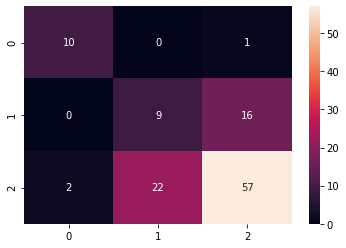

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.heatmap(cm_logi,annot=True)

C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

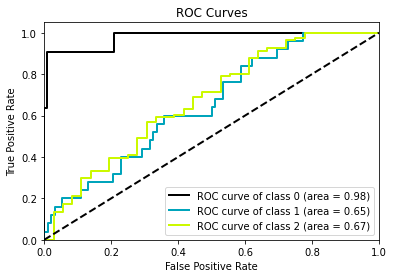

<Figure size 432x288 with 0 Axes>

In [20]:
import scikitplot as skplt
prob_logi=logi_reg.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_logi,curves=("each_class"))
plt.figure()

In [21]:
from sklearn.ensemble import RandomForestClassifier
mod_RF=RandomForestClassifier()
mod_RF.fit(x_train,y_train)
pred_RF=mod_RF.predict(x_test)


In [22]:
acc_RF=accuracy_score(y_test,pred_RF)
print(acc_RF*100)

71.7948717948718


<AxesSubplot:>

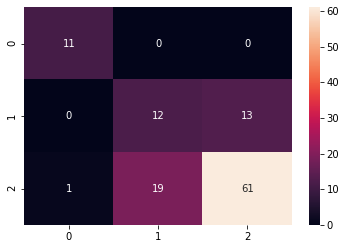

In [23]:
cm_RF=confusion_matrix(y_test,pred_RF)
sb.heatmap(cm_RF,annot=True)

C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

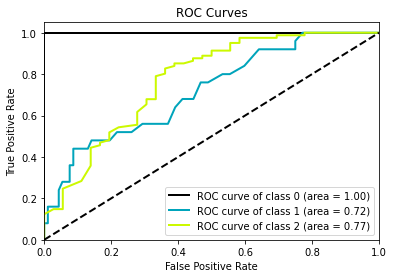

<Figure size 432x288 with 0 Axes>

In [24]:

prob_RF=mod_RF.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_RF,curves=("each_class"))
plt.figure()
#cm1=skplt.metrics.confusion_matrix(y_test,pred_RF)


40.17094017094017


C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

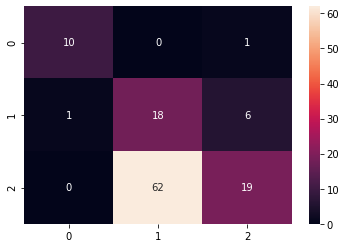

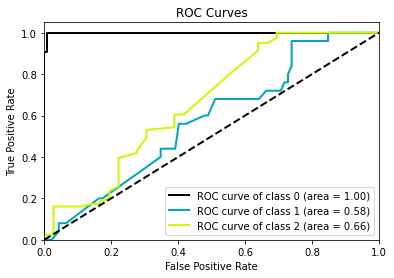

<Figure size 432x288 with 0 Axes>

In [25]:
from sklearn.ensemble import AdaBoostClassifier
mod_ada=AdaBoostClassifier()
mod_ada.fit(x_train,y_train)
pred_ada=mod_ada.predict(x_test)
acc_ada=accuracy_score(y_test,pred_ada)
print(acc_ada*100)
cm_ada=confusion_matrix(y_test,pred_ada)
sb.heatmap(cm_ada,annot=True)
prob_ada=mod_ada.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_ada,curves=("each_class"))
plt.figure()

68.37606837606837


C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

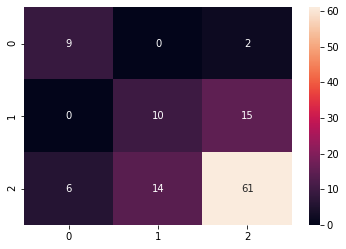

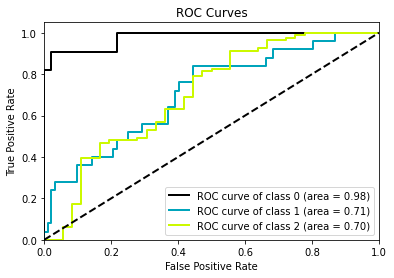

<Figure size 432x288 with 0 Axes>

In [26]:
from sklearn.svm import SVC
mod_svc=SVC(kernel='linear',probability = True)
mod_svc.fit(x_train,y_train)
pred_svc=mod_svc.predict(x_test)
acc_svc=accuracy_score(y_test,pred_svc)
print(acc_svc*100)
cm_svc=confusion_matrix(y_test,pred_svc)
sb.heatmap(cm_svc,annot=True)
prob_svc=mod_svc.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_svc,curves=("each_class"))
plt.figure()

Learning rate set to 0.075256
0:	learn: 1.0628518	total: 1.99s	remaining: 33m 10s
1:	learn: 1.0321851	total: 2.03s	remaining: 16m 54s
2:	learn: 1.0032474	total: 2.07s	remaining: 11m 27s
3:	learn: 0.9728881	total: 2.12s	remaining: 8m 49s
4:	learn: 0.9392298	total: 2.21s	remaining: 7m 19s
5:	learn: 0.9136330	total: 2.29s	remaining: 6m 20s
6:	learn: 0.8883426	total: 2.38s	remaining: 5m 38s
7:	learn: 0.8652049	total: 2.45s	remaining: 5m 4s
8:	learn: 0.8470597	total: 2.52s	remaining: 4m 37s
9:	learn: 0.8271355	total: 2.58s	remaining: 4m 15s
10:	learn: 0.8087148	total: 2.67s	remaining: 3m 59s
11:	learn: 0.7937945	total: 2.72s	remaining: 3m 43s
12:	learn: 0.7748586	total: 2.76s	remaining: 3m 29s
13:	learn: 0.7603802	total: 2.81s	remaining: 3m 17s
14:	learn: 0.7455418	total: 2.85s	remaining: 3m 6s
15:	learn: 0.7332462	total: 2.89s	remaining: 2m 58s
16:	learn: 0.7191635	total: 2.94s	remaining: 2m 49s
17:	learn: 0.7087881	total: 2.98s	remaining: 2m 42s
18:	learn: 0.6954793	total: 3.02s	remaining

163:	learn: 0.2005714	total: 9.32s	remaining: 47.5s
164:	learn: 0.1995412	total: 9.36s	remaining: 47.4s
165:	learn: 0.1981675	total: 9.43s	remaining: 47.4s
166:	learn: 0.1965037	total: 9.51s	remaining: 47.4s
167:	learn: 0.1950164	total: 9.57s	remaining: 47.4s
168:	learn: 0.1940358	total: 9.64s	remaining: 47.4s
169:	learn: 0.1924084	total: 9.71s	remaining: 47.4s
170:	learn: 0.1910664	total: 9.76s	remaining: 47.3s
171:	learn: 0.1900474	total: 9.81s	remaining: 47.2s
172:	learn: 0.1886779	total: 9.87s	remaining: 47.2s
173:	learn: 0.1878017	total: 9.93s	remaining: 47.2s
174:	learn: 0.1867976	total: 9.99s	remaining: 47.1s
175:	learn: 0.1853231	total: 10s	remaining: 47s
176:	learn: 0.1840120	total: 10.1s	remaining: 46.8s
177:	learn: 0.1831115	total: 10.1s	remaining: 46.8s
178:	learn: 0.1817419	total: 10.2s	remaining: 46.8s
179:	learn: 0.1802878	total: 10.3s	remaining: 46.7s
180:	learn: 0.1790652	total: 10.3s	remaining: 46.7s
181:	learn: 0.1781114	total: 10.4s	remaining: 46.7s
182:	learn: 0.17

324:	learn: 0.0870566	total: 17.6s	remaining: 36.6s
325:	learn: 0.0866133	total: 17.6s	remaining: 36.5s
326:	learn: 0.0861980	total: 17.7s	remaining: 36.4s
327:	learn: 0.0858715	total: 17.7s	remaining: 36.3s
328:	learn: 0.0855661	total: 17.8s	remaining: 36.3s
329:	learn: 0.0852637	total: 17.8s	remaining: 36.2s
330:	learn: 0.0850438	total: 17.9s	remaining: 36.1s
331:	learn: 0.0847053	total: 17.9s	remaining: 36s
332:	learn: 0.0843722	total: 18s	remaining: 36s
333:	learn: 0.0841325	total: 18s	remaining: 35.9s
334:	learn: 0.0838757	total: 18.1s	remaining: 35.8s
335:	learn: 0.0834203	total: 18.1s	remaining: 35.8s
336:	learn: 0.0830147	total: 18.1s	remaining: 35.7s
337:	learn: 0.0825926	total: 18.2s	remaining: 35.6s
338:	learn: 0.0822421	total: 18.2s	remaining: 35.5s
339:	learn: 0.0819181	total: 18.3s	remaining: 35.5s
340:	learn: 0.0816033	total: 18.3s	remaining: 35.4s
341:	learn: 0.0813086	total: 18.4s	remaining: 35.3s
342:	learn: 0.0809928	total: 18.4s	remaining: 35.2s
343:	learn: 0.080610

485:	learn: 0.0496787	total: 26.1s	remaining: 27.6s
486:	learn: 0.0495326	total: 26.2s	remaining: 27.6s
487:	learn: 0.0493922	total: 26.2s	remaining: 27.5s
488:	learn: 0.0492797	total: 26.3s	remaining: 27.5s
489:	learn: 0.0491708	total: 26.3s	remaining: 27.4s
490:	learn: 0.0489811	total: 26.4s	remaining: 27.4s
491:	learn: 0.0488795	total: 26.4s	remaining: 27.3s
492:	learn: 0.0487394	total: 26.5s	remaining: 27.3s
493:	learn: 0.0486361	total: 26.5s	remaining: 27.2s
494:	learn: 0.0484935	total: 26.6s	remaining: 27.1s
495:	learn: 0.0483983	total: 26.6s	remaining: 27.1s
496:	learn: 0.0482894	total: 26.7s	remaining: 27s
497:	learn: 0.0481335	total: 26.7s	remaining: 26.9s
498:	learn: 0.0479944	total: 26.7s	remaining: 26.8s
499:	learn: 0.0478606	total: 26.8s	remaining: 26.8s
500:	learn: 0.0477185	total: 26.8s	remaining: 26.7s
501:	learn: 0.0475936	total: 26.8s	remaining: 26.6s
502:	learn: 0.0475086	total: 26.8s	remaining: 26.5s
503:	learn: 0.0473874	total: 26.9s	remaining: 26.5s
504:	learn: 0.

648:	learn: 0.0328954	total: 31.9s	remaining: 17.3s
649:	learn: 0.0328464	total: 32s	remaining: 17.2s
650:	learn: 0.0327564	total: 32s	remaining: 17.2s
651:	learn: 0.0327116	total: 32.1s	remaining: 17.1s
652:	learn: 0.0326222	total: 32.1s	remaining: 17.1s
653:	learn: 0.0325667	total: 32.1s	remaining: 17s
654:	learn: 0.0324637	total: 32.2s	remaining: 16.9s
655:	learn: 0.0323646	total: 32.2s	remaining: 16.9s
656:	learn: 0.0323089	total: 32.3s	remaining: 16.8s
657:	learn: 0.0322572	total: 32.3s	remaining: 16.8s
658:	learn: 0.0321803	total: 32.3s	remaining: 16.7s
659:	learn: 0.0320968	total: 32.4s	remaining: 16.7s
660:	learn: 0.0319916	total: 32.4s	remaining: 16.6s
661:	learn: 0.0319550	total: 32.4s	remaining: 16.6s
662:	learn: 0.0318958	total: 32.5s	remaining: 16.5s
663:	learn: 0.0318549	total: 32.5s	remaining: 16.4s
664:	learn: 0.0317782	total: 32.5s	remaining: 16.4s
665:	learn: 0.0316834	total: 32.6s	remaining: 16.3s
666:	learn: 0.0316260	total: 32.6s	remaining: 16.3s
667:	learn: 0.0315

808:	learn: 0.0240719	total: 38.5s	remaining: 9.08s
809:	learn: 0.0240424	total: 38.5s	remaining: 9.03s
810:	learn: 0.0239931	total: 38.5s	remaining: 8.98s
811:	learn: 0.0239508	total: 38.6s	remaining: 8.93s
812:	learn: 0.0239156	total: 38.6s	remaining: 8.88s
813:	learn: 0.0238642	total: 38.6s	remaining: 8.83s
814:	learn: 0.0238249	total: 38.7s	remaining: 8.78s
815:	learn: 0.0237767	total: 38.7s	remaining: 8.73s
816:	learn: 0.0237570	total: 38.7s	remaining: 8.68s
817:	learn: 0.0237202	total: 38.8s	remaining: 8.63s
818:	learn: 0.0236634	total: 38.8s	remaining: 8.58s
819:	learn: 0.0236318	total: 38.8s	remaining: 8.53s
820:	learn: 0.0235884	total: 38.9s	remaining: 8.47s
821:	learn: 0.0235490	total: 38.9s	remaining: 8.42s
822:	learn: 0.0235127	total: 38.9s	remaining: 8.37s
823:	learn: 0.0234511	total: 39s	remaining: 8.32s
824:	learn: 0.0234243	total: 39s	remaining: 8.27s
825:	learn: 0.0233648	total: 39s	remaining: 8.22s
826:	learn: 0.0233247	total: 39.1s	remaining: 8.17s
827:	learn: 0.0232

968:	learn: 0.0187771	total: 45.3s	remaining: 1.45s
969:	learn: 0.0187455	total: 45.3s	remaining: 1.4s
970:	learn: 0.0187131	total: 45.4s	remaining: 1.35s
971:	learn: 0.0186883	total: 45.4s	remaining: 1.31s
972:	learn: 0.0186515	total: 45.4s	remaining: 1.26s
973:	learn: 0.0186339	total: 45.5s	remaining: 1.21s
974:	learn: 0.0186035	total: 45.5s	remaining: 1.17s
975:	learn: 0.0185794	total: 45.6s	remaining: 1.12s
976:	learn: 0.0185546	total: 45.6s	remaining: 1.07s
977:	learn: 0.0185278	total: 45.7s	remaining: 1.03s
978:	learn: 0.0184974	total: 45.7s	remaining: 981ms
979:	learn: 0.0184757	total: 45.8s	remaining: 934ms
980:	learn: 0.0184492	total: 45.8s	remaining: 888ms
981:	learn: 0.0184218	total: 45.9s	remaining: 841ms
982:	learn: 0.0183989	total: 45.9s	remaining: 794ms
983:	learn: 0.0183638	total: 46s	remaining: 748ms
984:	learn: 0.0183462	total: 46s	remaining: 701ms
985:	learn: 0.0183243	total: 46.1s	remaining: 655ms
986:	learn: 0.0182851	total: 46.1s	remaining: 608ms
987:	learn: 0.018

C:\Users\Manisha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

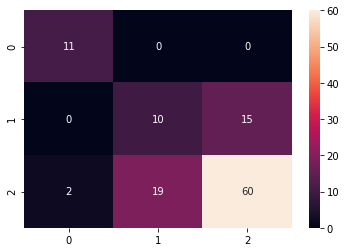

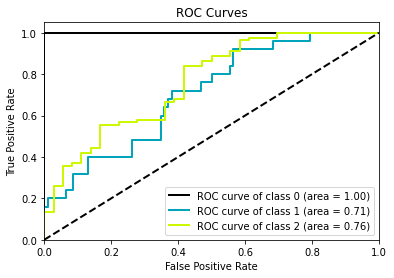

<Figure size 432x288 with 0 Axes>

In [27]:
from catboost import CatBoostClassifier
mod_Cat=CatBoostClassifier()
mod_Cat.fit(x_train,y_train)
pred_Cat=mod_Cat.predict(x_test)
acc_Cat=accuracy_score(y_test,pred_Cat)
print(acc_Cat*100)
cm_Cat=confusion_matrix(y_test,pred_Cat)
sb.heatmap(cm_Cat,annot=True)
prob_Cat=mod_Cat.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_Cat,curves=("each_class"))
plt.figure()

In [28]:
ACC=pd.DataFrame({'Algorithm':['Logistic Regression', 'Random Forest','Adaboost','SVM','CatBoost'],'Accuracy':[acc_logi*100,acc_RF*100,acc_ada*100,acc_svc*100, acc_Cat*100]},columns=['Algorithm','Accuracy'])

In [29]:
ACC.head()

,Algorithm,Accuracy
0,Logistic Regression,64.957265
1,Random Forest,71.794872
2,Adaboost,40.170940
3,SVM,68.376068
4,CatBoost,69.230769


# Testing Try

In [30]:
import pickle
pickle.dump(mod_RF, open('mod_RF_ml.pkl', 'wb'))

In [31]:
# testing folder
test_folder = 'C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/'
val_folder = 'C:/Users/Manisha/BE_Project/Physionet_Dataset/validation/validation/'
test = test_folder + '/testing/'
val = val_folder + '/the_val/'

In [32]:
files = fnmatch.filter(os.listdir(test_folder), '*.wav')
sounds = load_file_data(folder=test_folder,file_names=files, duration=MAX_SOUND_CLIP_DURATION)
labels = [-1 for items in sounds]

load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0005.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0006.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0007.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0008.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0009.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0010.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0011.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0012.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0013.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0014.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0015.wav
load file  C:/Users/Manisha/BE_Project/Machine Learning Try/test_1/a0016.wav


In [33]:
files_list = os.listdir(test_folder)

In [34]:
testing_data = np.squeeze(sounds)
print(testing_data)

[[-4.79305278e+02  7.58535507e+01  6.35984131e+01  4.79808287e+01
   3.38212618e+01  2.44050393e+01  2.03235760e+01  1.97623182e+01
   1.99180483e+01  1.86558578e+01  1.54919980e+01  1.14782301e+01
   8.23484636e+00  6.82617870e+00  7.16047960e+00  8.18794412e+00
   8.65698096e+00  7.88910201e+00  6.09898175e+00  4.12992983e+00
   2.84989332e+00  2.62530202e+00  3.18113831e+00  3.87185148e+00
   4.13034389e+00  3.78860530e+00  3.09335863e+00  2.46104243e+00
   2.17406778e+00  2.22315918e+00  2.37093202e+00  2.35487484e+00
   2.07072982e+00  1.61790177e+00  1.20085398e+00  9.77722000e-01
   9.66728352e-01  1.06227222e+00  1.12878844e+00  1.09326555e+00]
 [-5.10447948e+02  1.18006491e+02  8.40888578e+01  4.69363156e+01
   2.13981878e+01  1.39082068e+01  2.04007675e+01  2.99061364e+01
   3.25308923e+01  2.54325875e+01  1.32351536e+01  3.54415591e+00
   1.16324199e+00  5.24794828e+00  1.07693153e+01  1.27135591e+01
   9.66643202e+00  4.19449922e+00  3.40381312e-01  4.12100890e-01
   3.4759

In [35]:
# dir(mod_RF)

# 
prediction = mod_RF.predict(testing_data)
# print(prediction)
filename = 'a000' 
start = 5
for item in prediction:
    file = filename + str(start) + '.wav'
    print(file)
    if item == 2:
        print(f"{item}:::Normal Heart Sound")
    else:
        print(f"{item}:::Abnormal Heart Sound")
    start = start + 1 


a0005.wav
2:::Normal Heart Sound
a0006.wav
1:::Abnormal Heart Sound
a0007.wav
1:::Abnormal Heart Sound
a0008.wav
1:::Abnormal Heart Sound
a0009.wav
2:::Normal Heart Sound
a00010.wav
2:::Normal Heart Sound
a00011.wav
2:::Normal Heart Sound
a00012.wav
1:::Abnormal Heart Sound
a00013.wav
2:::Normal Heart Sound
a00014.wav
1:::Abnormal Heart Sound
a00015.wav
1:::Abnormal Heart Sound
a00016.wav
1:::Abnormal Heart Sound
